In [4]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

# Matching Pennies

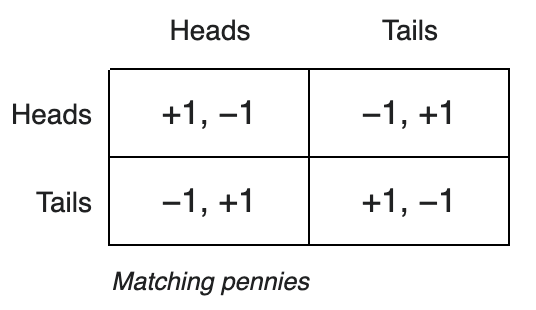

In [5]:
display.Image("/Users/henningheyen/Desktop/Studium/TUM/BachelorThesis/Git/NoRegretLearning/Screenshots/MatchingPenniesWikipedia.png", width = 300)

In [15]:
# number of iterations
T = int(100)

#number of players
n = 2

#number of strategies 
d = 2

#Lipschitz Constant
L = 1



#Mirror Descent in this case uses entropic regularization: R(x) = sum_i=1^d(x[i] * log(x[i])) (which is 1 strongly convex over the probability simplex (Shalev-Shwartz, p.136))
#for online mirror descent step size should be: eta = sqrt(log(d))/(L*sqrt(2T)) (Shalev-Shwartz, p.140)
#where,
#d:dimension (number of strategies)
#L: Lipschitz constance
#T: number of Iterations
#this eta yields regret bound of: Regret_T(S) <= B*L*sqrt(2*log(d)*T), note: This is better than Gradient Descent using Euclidean Regularizer
#where S = {x : l1norm(x) = B AND x > 0}


#step size 
#proper eta
eta = np.sqrt(np.log(d))/(L*np.sqrt(2*T))
print(eta)
#eta = 0.4



0.05887050112577373


In [16]:
######### MATCHING PENNIES #########

# payoff matrix player 1:
A = np.array([[1,-1],[-1,1]])

# payoff matrix player 2:
B = -A

In [17]:
######### INITIALIZATION #########
p1_Head = 0.1
p2_Head = 0.1
strategy1 = np.array([p1_Head, 1-p1_Head])  
strategy2 = np.array([p2_Head, 1-p2_Head]) 

    
# list to store results
p1, p2 = [p1_Head], [p2_Head]

########## Online Gradient Ascent #############

for t in range(T):

    # compute gradient
    grad1 = A.dot(strategy2)
    grad2 = strategy1.transpose().dot(B) 

    # update strategy (OMA with entropic regularizer)
    strategy1 = strategy1*np.exp(eta*grad1)/sum(strategy1*np.exp(eta*grad1))
    strategy2 = strategy2*np.exp(eta*grad2)/sum(strategy2*np.exp(eta*grad2))

    # store p_Head in result vector p
    p1 += [strategy1[0]]
    p2 += [strategy2[0]]

print(np.mean(p1))
print(np.mean(p2))

0.3810167467859173
0.739452791593212


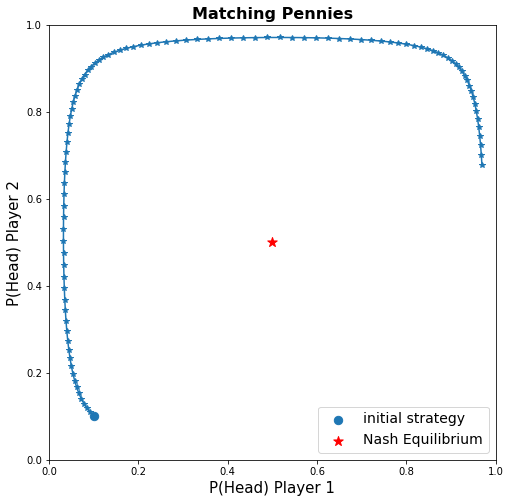

In [18]:
plt.figure(figsize = (8,8))

plt.scatter(p1_Head, p2_Head, color='tab:blue',marker='o',s=70, zorder=1, label='initial strategy')
plt.scatter([0.5], [0.5], color='red',marker='*',s=100, label='Nash Equilibrium')
plt.plot(p1,p2, marker = '*')

plt.xlabel('P(Head) Player 1', fontsize=15)
plt.ylabel('P(Head) Player 2', fontsize=15)
plt.title('Matching Pennies', fontsize=16, fontweight='bold')
plt.legend(fontsize=14)
plt.ylim(0,1); plt.xlim(0,1)
plt.show()